In [2]:
#importing library
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix,classification_report

In [3]:
#loading the dataset
df_2c=pd.read_csv('../input/biomechanical-features-of-orthopedic-patients/column_2C_weka.csv')
df_3c=pd.read_csv('../input/biomechanical-features-of-orthopedic-patients/column_3C_weka.csv')

In [4]:
#loading the dataset
df_2c

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


In [5]:
df_3c

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


In [6]:
df_3c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [10]:
#Preprocssing inputs
y_2c=df_2c['class'].copy()
y_3c=df_3c['class'].copy()
x=df_2c.drop('class',axis=1).copy()

In [8]:
y_2c

0      Abnormal
1      Abnormal
2      Abnormal
3      Abnormal
4      Abnormal
         ...   
305      Normal
306      Normal
307      Normal
308      Normal
309      Normal
Name: class, Length: 310, dtype: object

In [9]:
y_3c

0      Hernia
1      Hernia
2      Hernia
3      Hernia
4      Hernia
        ...  
305    Normal
306    Normal
307    Normal
308    Normal
309    Normal
Name: class, Length: 310, dtype: object

In [11]:
x

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501
...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750


In [14]:
#scaling the dataset
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x))


In [16]:
#train_test_split
x_train,x_test,y_2c_train,y_2c_test,y_3c_train,y_3c_test=train_test_split(x,y_2c,y_3c,train_size=0.7,random_state=123)

In [17]:
print(x_train.shape)
print(x_test.shape)
print(y_2c_train.shape)
print(y_2c_test.shape)
print(y_3c_train.shape)
print(y_3c_test.shape)

(217, 6)
(93, 6)
(217,)
(93,)
(217,)
(93,)


In [22]:
model_2c=LogisticRegressionCV()
model_2c.fit(x_train,y_2c_train)


LogisticRegressionCV()

In [21]:
model_3c=LogisticRegressionCV()
model_3c.fit(x_train,y_3c_train)

LogisticRegressionCV()

In [23]:
print(model_2c.score(x_test,y_2c_test))
print(model_3c.score(x_test,y_3c_test))

0.8279569892473119
0.8279569892473119


In [31]:
#Generate predictions
y_2c_true=np.array(y_2c_test)
y_2c_pred=model_2c.predict(x_test)

In [34]:
y_3c_pred=model_3c.predict(x_test)
y_3c_true=np.array(y_3c_test)

In [35]:
#importing visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
cm_2c=confusion_matrix(y_2c_true,y_2c_pred)
cm_3c=confusion_matrix(y_3c_true,y_3c_pred)

In [37]:
print(cm_2c)

[[54 11]
 [ 5 23]]


In [38]:
print(cm_3c)

[[11  9  1]
 [ 5 23  0]
 [ 1  0 43]]


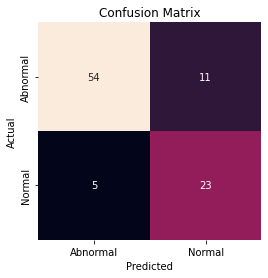

In [40]:
#ploting confusion matrix 
plt.figure(figsize=(4,4))
sns.heatmap(cm_2c,annot=True,fmt='g',cbar=False)
plt.xticks(np.arange(2)+0.5,['Abnormal','Normal'])
plt.yticks(np.arange(2)+0.5,['Abnormal','Normal'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

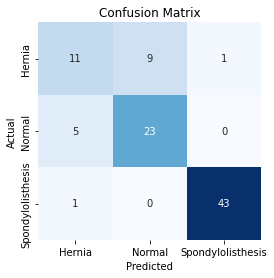

In [47]:
#ploting confusion matrix 
plt.figure(figsize=(4,4))
sns.heatmap(cm_3c,annot=True,fmt='g',cbar=False,cmap='Blues')
plt.xticks(np.arange(3)+0.5,['Hernia', 'Normal','Spondylolisthesis'])
plt.yticks(np.arange(3)+0.5,['Hernia','Normal', 'Spondylolisthesis'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [42]:
y_3c.unique()

array(['Hernia', 'Spondylolisthesis', 'Normal'], dtype=object)

In [44]:
clr_2c=classification_report(y_2c_true,y_2c_pred)
clr_3c=classification_report(y_3c_true,y_3c_pred)

In [46]:
print(clr_3c)

                   precision    recall  f1-score   support

           Hernia       0.65      0.52      0.58        21
           Normal       0.72      0.82      0.77        28
Spondylolisthesis       0.98      0.98      0.98        44

         accuracy                           0.83        93
        macro avg       0.78      0.77      0.77        93
     weighted avg       0.82      0.83      0.82        93

